### Logistic Regression.

### Data Exploration(EDA) :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_df = pd.read_csv("/content/Titanic_train.csv")
test_df = pd.read_csv("/content/Titanic_test.csv")

In [3]:
print("Training Data Info:")
train_df.info()



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
print("\nTesting Data Info:")
test_df.info()


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
# Checking the data types of dataframe
train_df.dtypes,test_df.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [6]:
train_df.shape,test_df.shape


((891, 12), (418, 11))

In [7]:
print("\nMissing values in training data:")
print(train_df.isnull().sum())


Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
print("\nMissing values in training data:")
print(test_df.isnull().sum())


Missing values in training data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:

print("\nSummary statistics:")
print(train_df.describe())



Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


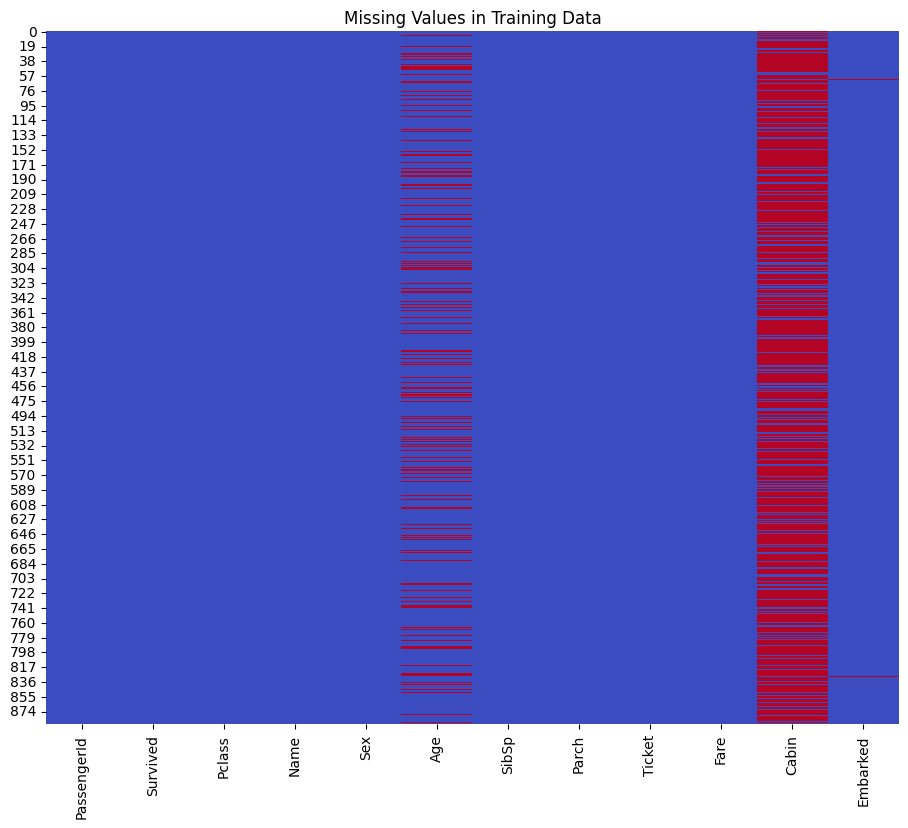

In [10]:
# Visualizing missing values
plt.figure(figsize=(11, 9))
sns.heatmap(train_df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values in Training Data")
plt.show()

<ipython-input-11-36fe4078feb2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette="cividis")


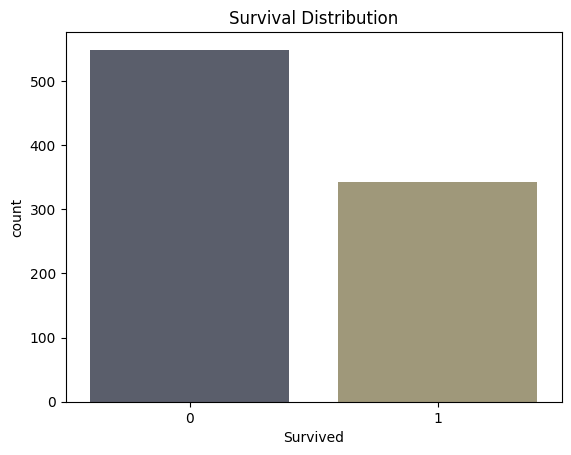

In [11]:
sns.countplot(x='Survived', data=train_df, palette="cividis")
plt.title("Survival Distribution")
plt.show()

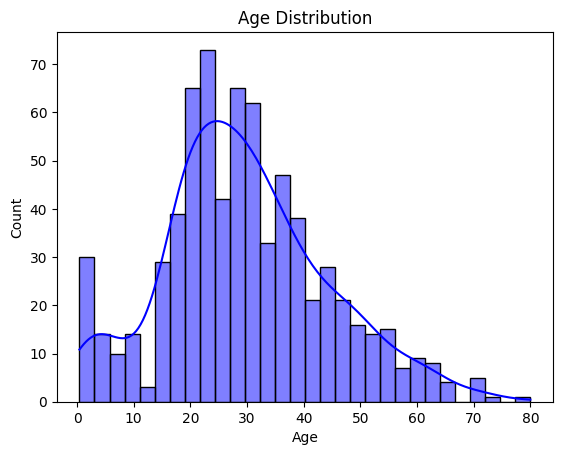

In [12]:
# Age Distribution
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()


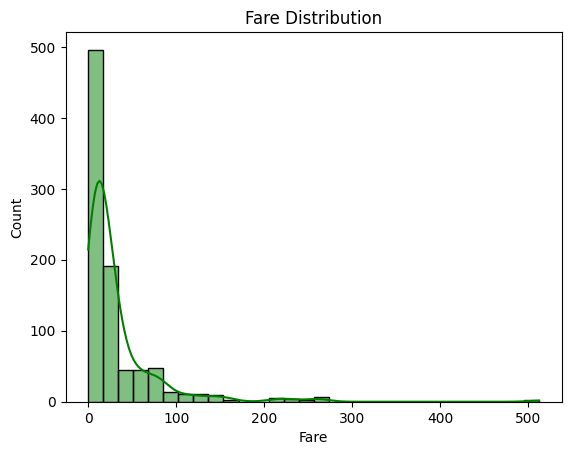

In [13]:
sns.histplot(train_df['Fare'], bins=30, kde=True, color='green')
plt.title("Fare Distribution")
plt.show()

<ipython-input-14-643f9e6aadd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_df, ax=axes[i], palette='coolwarm')
<ipython-input-14-643f9e6aadd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_df, ax=axes[i], palette='coolwarm')
<ipython-input-14-643f9e6aadd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=train_df, ax=axes[i], palette='coolwarm')


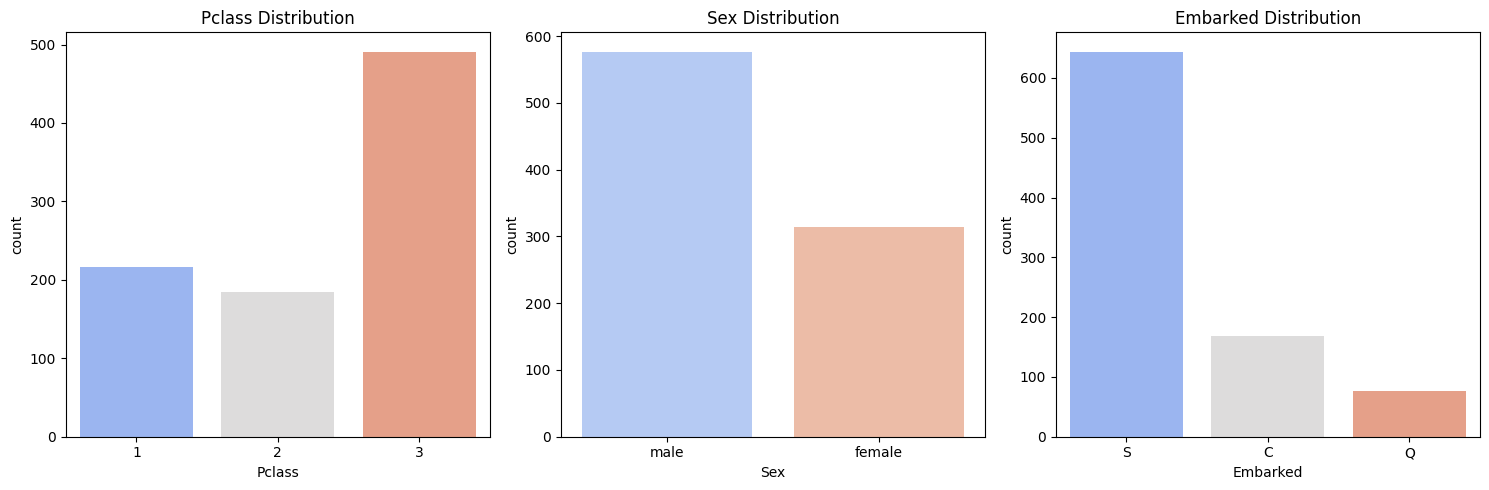

In [14]:
# Count plot
categorical_features = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=train_df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f"{feature} Distribution")

plt.tight_layout()
plt.show()

### Data Preprocessing :

In [15]:
# Fill missing Age values with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

<ipython-input-15-0efe814e2fe8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-15-0efe814e2fe8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [16]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


<ipython-input-16-0be6a0f72384>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [17]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


<ipython-input-17-d0df82d26566>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [18]:
# Drop the 'Cabin' column (too many missing values)
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [19]:
print("\nMissing values after handling:")
print(train_df.isnull().sum())


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [20]:
print(test_df.isnull().sum())


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
# Convert categorical variables into numerical values

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

print("\nPreview of processed training data:")
print(train_df.head())


Preview of processed training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000 

In [22]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Model Building :

Build and train a Logistic Regression mode.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, roc_curve


# Selecting the features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
x = train_df[features]
y = train_df['Survived']

In [24]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

### Model Evaluation :

In [28]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

In [29]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC AUC Score: 0.8820


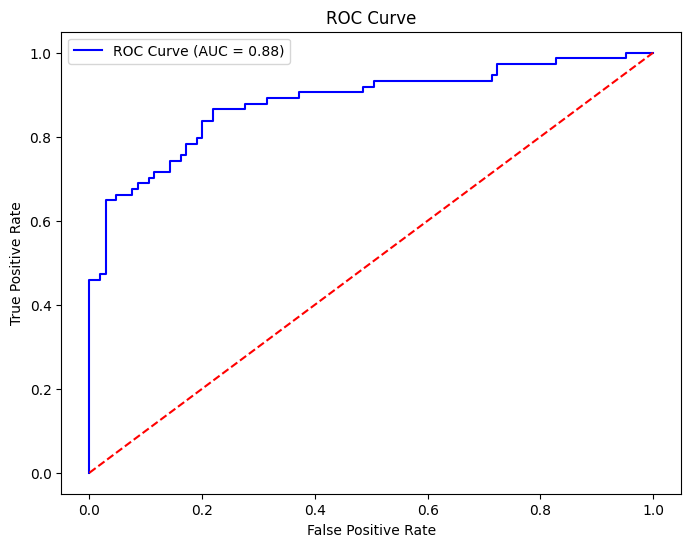

In [30]:
# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Model Interpretation :

In [31]:
# Creating a DataFrame for feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

In [32]:
print("\nFeature Importance in Logistic Regression:")
print(coef_df)



Feature Importance in Logistic Regression:
      Feature  Coefficient
4        Fare     0.126511
6  Embarked_Q    -0.046058
3       Parch    -0.096142
7  Embarked_S    -0.189423
2       SibSp    -0.349952
1         Age    -0.396152
0      Pclass    -0.785328
5    Sex_male    -1.277104


<ipython-input-33-ff2d34a22793>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


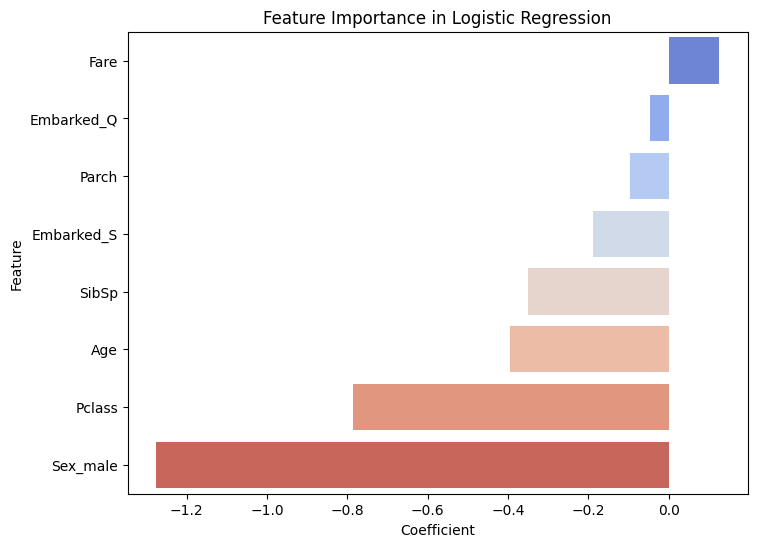

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Importance in Logistic Regression")
plt.show()

### Deploment with streamlit:

In [34]:
!pip install streamlit pyngrok -q


In [35]:
import pickle

# Save trained model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [36]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

model = pickle.load(open("logistic_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

# Streamlit App UI
st.title("Titanic Survival Prediction")
st.markdown("Enter passenger details to predict survival probability.")

# User Inputs
pclass = st.selectbox("Passenger Class (1st, 2nd, 3rd)", [1, 2, 3])
age = st.number_input("Age", min_value=1, max_value=100, value=25)
sibsp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0, value=30)
sex = st.selectbox("Sex", ["Male", "Female"])
embarked = st.selectbox("Embarked", ["C", "Q", "S"])

# Encoding categorical variables
sex_male = 1 if sex == "Male" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0

# Prepare input data
input_data = np.array([[pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]])
input_data_scaled = scaler.transform(input_data)

# Prediction
if st.button("Predict"):
    prediction = model.predict(input_data_scaled)
    survival_prob = model.predict_proba(input_data_scaled)[0][1]
    result = "Survived" if prediction[0] == 1 else "Did Not Survive"

    st.write(f"**Prediction:** {result}")
    st.write(f"**Survival Probability:** {survival_prob:.2f}")

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.173.6:8501

⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://plain-rice-invent.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### **Output Result:**
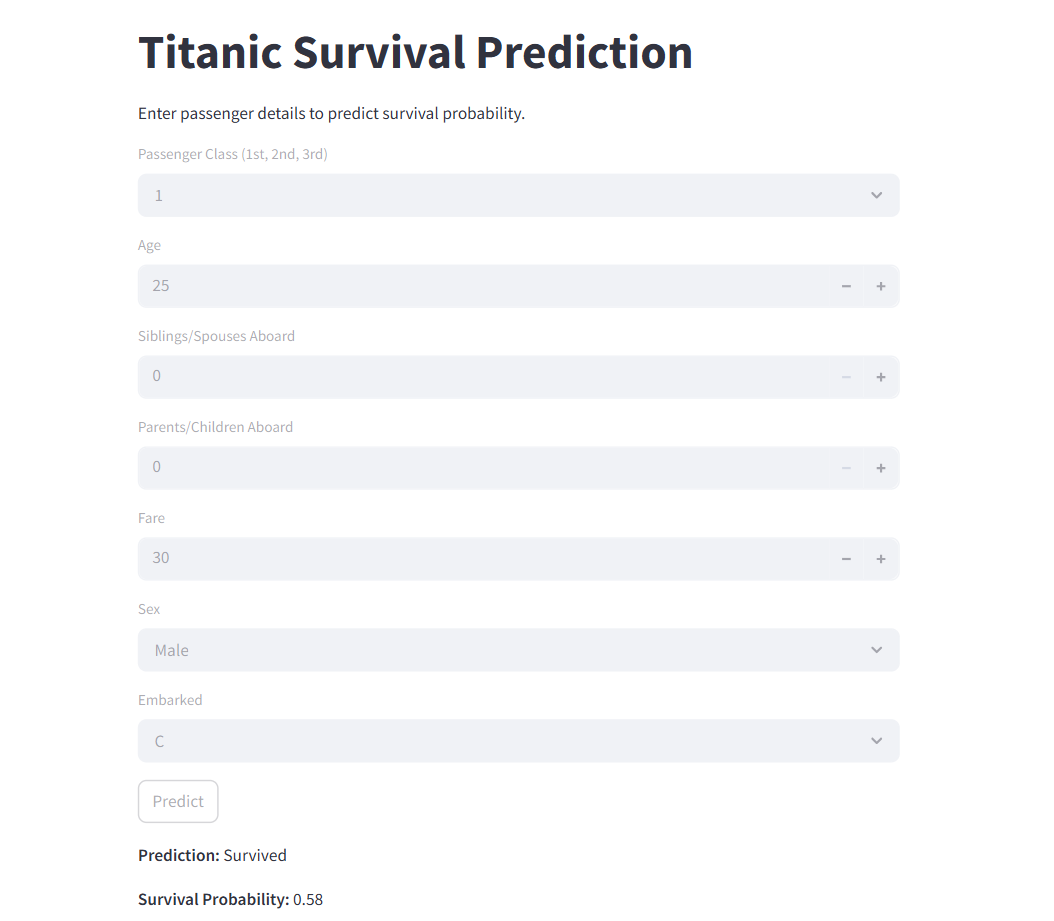

### **Interview Questions:**


1. What is the difference between precision and recall?
* Precision measures the accuracy of positive predictions (TP / (TP + FP)), while recall measures how well all actual positives are identified (TP / (TP + FN)).
------------------------------------------------
2. What is cross-validation, and why is it important in binary classification?
* Cross-validation splits data into multiple training and testing sets to evaluate model performance and prevent overfitting in binary classification.